# Predictions using the location informations and the prices.

## Load CSV files

In [1]:
import pandas as pd

# Load the two CSV files into dataframes
merge_df = pd.read_csv('/workspaces/Coworking/src/results/merged_df.csv')

# Display the first few rows to confirm the data is loaded correctly
print(merge_df.head())


                    name Neightboorhood  Population  \
0  Talent Garden Madrid        Delicias       28575   
1        Freeland Cowork        Adelfas       18832   
2           LOOM Huertas         Cortes       10816   
3                EslabOn         Opañel       33883   
4                   Area       Delicias       28575   

  Percentage of population between 16 and 64 years ForeignPopulation  \
0                                            69,3%            13.00%   
1                                           64,6 %             8,6 %   
2                                            76,4%             28,4%   
3                                            68,7%            25.00%   
4                                            69,3%            13.00%   

   Unemployes  Household average net rent  Metro Closest bus stop  Mesa Fija  \
0         962                       45392      6             900m        285   
1         591                       50837      5             150m        150

## Data Processing.

In [2]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   name                                              5 non-null      object
 1   Neightboorhood                                    5 non-null      object
 2   Population                                        5 non-null      int64 
 3   Percentage of population between 16 and 64 years  5 non-null      object
 4   ForeignPopulation                                 5 non-null      object
 5   Unemployes                                        5 non-null      int64 
 6   Household average net rent                        5 non-null      int64 
 7   Metro                                             5 non-null      int64 
 8   Closest bus stop                                  5 non-null      object
 9   Mesa Fija                           

In [4]:
print(merge_df[['Percentage of population between 16 and 64 years', 'ForeignPopulation']])

  Percentage of population between 16 and 64 years ForeignPopulation
0                                            69,3%            13.00%
1                                           64,6 %             8,6 %
2                                            76,4%             28,4%
3                                            68,7%            25.00%
4                                            69,3%            13.00%


In [6]:
import pandas as pd

# Remove the '%' sign from percentage columns and convert to float
merge_df['Percentage of population between 16 and 64 years'] = merge_df['Percentage of population between 16 and 64 years'].str.replace('%', '').str.replace(',', '.').astype(float) / 100
merge_df['ForeignPopulation'] = merge_df['ForeignPopulation'].str.replace('%', '').str.replace(',', '.').astype(float) / 100

# Convert price columns to numeric values (they are currently likely strings)
merge_df['Mesa Fija'] = pd.to_numeric(merge_df['Mesa Fija'], errors='coerce')
merge_df['Mesa Flexible'] = pd.to_numeric(merge_df['Mesa Flexible'], errors='coerce')
merge_df['Despacho Priado'] = pd.to_numeric(merge_df['Despacho Priado'], errors='coerce')
merge_df['Pases/Bonos (días)'] = pd.to_numeric(merge_df['Pases/Bonos (días)'], errors='coerce')

# Check if there are any other non-numeric columns
print(merge_df.dtypes)

# Clean up the data and inspect
print(merge_df.head())


name                                                 object
Neightboorhood                                       object
Population                                            int64
Percentage of population between 16 and 64 years    float64
ForeignPopulation                                   float64
Unemployes                                            int64
Household average net rent                            int64
Metro                                                 int64
Closest bus stop                                     object
Mesa Fija                                             int64
Mesa Flexible                                         int64
Despacho Priado                                       int64
Pases/Bonos (días)                                    int64
dtype: object
                    name Neightboorhood  Population  \
0  Talent Garden Madrid        Delicias       28575   
1        Freeland Cowork        Adelfas       18832   
2           LOOM Huertas         Cortes  

In [8]:
# Check for missing values
print(merge_df.isnull().sum())

name                                                0
Neightboorhood                                      0
Population                                          0
Percentage of population between 16 and 64 years    0
ForeignPopulation                                   0
Unemployes                                          0
Household average net rent                          0
Metro                                               0
Closest bus stop                                    0
Mesa Fija                                           0
Mesa Flexible                                       0
Despacho Priado                                     0
Pases/Bonos (días)                                  0
dtype: int64


## Visualizations.

### Heatmap

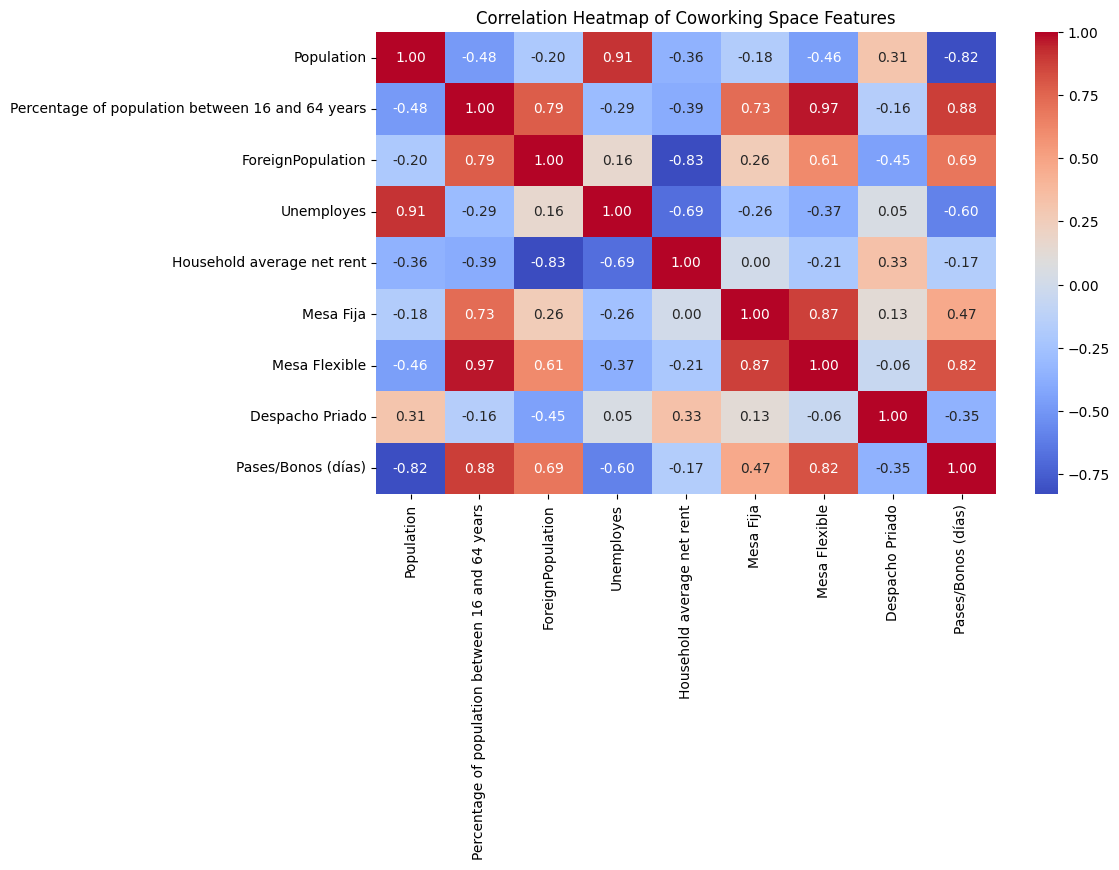

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation matrix
numeric_columns = ['Population', 'Percentage of population between 16 and 64 years', 'ForeignPopulation', 
                   'Unemployes', 'Household average net rent', 'Mesa Fija', 
                   'Mesa Flexible', 'Despacho Priado', 'Pases/Bonos (días)']

# Calculate the correlation matrix
corr_matrix = merge_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Coworking Space Features')
plt.show()


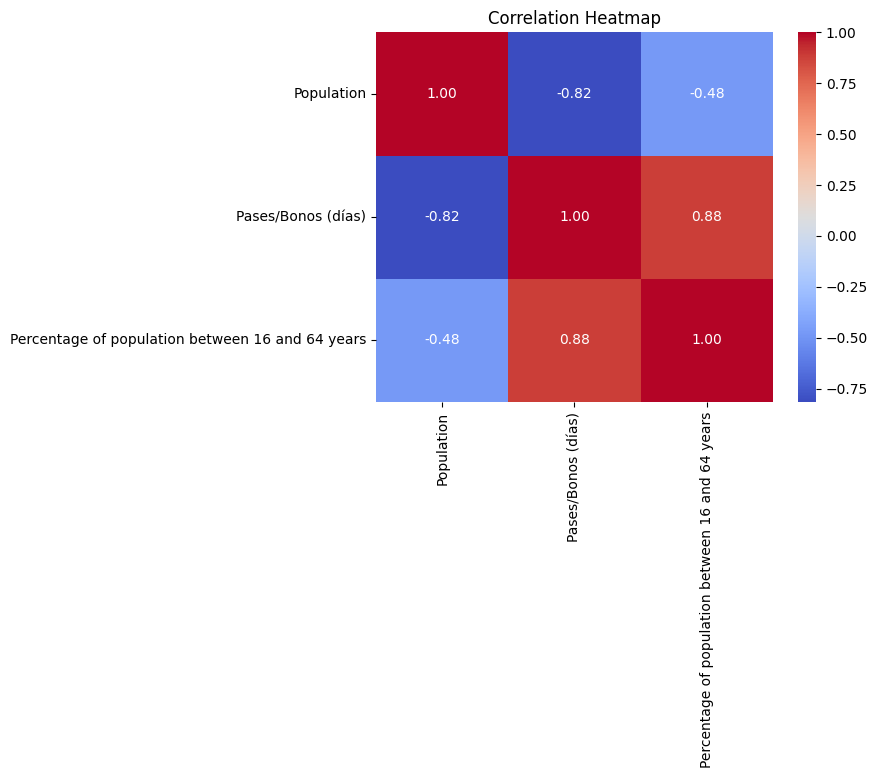

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for relevant columns
correlation_matrix = merge_df[['Population', 'Pases/Bonos (días)', 'Percentage of population between 16 and 64 years']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Scatter Plot

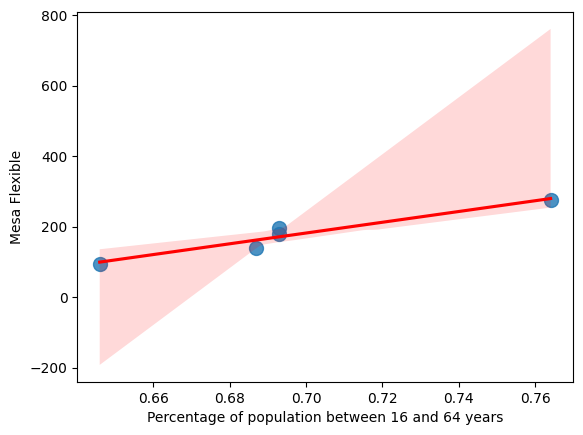

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a regression line
sns.regplot(x='Percentage of population between 16 and 64 years', y='Mesa Flexible', data=merge_df, scatter_kws={'s': 100}, line_kws={'color': 'red'})

# Show the plot
plt.show()



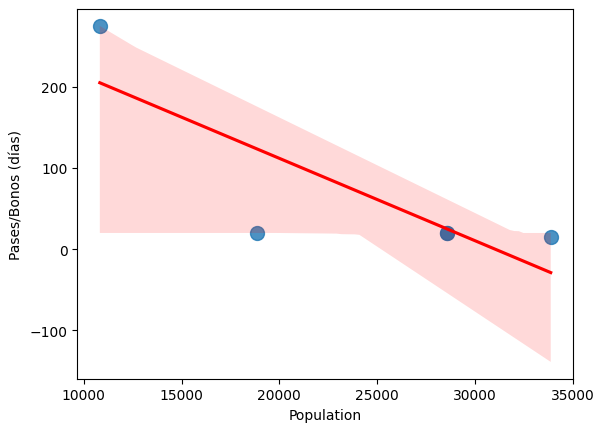

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a regression line
sns.regplot(x='Population', y='Pases/Bonos (días)', data=merge_df, scatter_kws={'s': 100}, line_kws={'color': 'red'})

# Show the plot
plt.show()